In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
df = pd.read_csv('/content/final s&P 500 complete dataset - Sheet1.csv')
#You might need to copy the file path and paste it ^^^^ in the line above.

df['Date'] = pd.to_datetime(df['Date'], format='%b %Y')
#print(df.head())


columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Unemp Rate%', 'Interest Rates']

for col in columns:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)

df['Pct_Change_Open'] = df['Open'].pct_change()
df['Pct_Change_High'] = df['High'].pct_change()
df['Pct_Change_Low'] = df['Low'].pct_change()
df['Pct_Change_Close'] = df['Close'].pct_change()
df['Pct_Change_Adj_Close'] = df['Adj Close'].pct_change()
df['Pct_Change_Volume'] = df['Volume'].pct_change()
df['Pct_Change_Unemp_Rate%'] = df['Unemp Rate%'].pct_change()
df['Pct_Change_Interest_Rates'] = df['Interest Rates'].pct_change()

secondDf = df

print(df[['Date', 'Pct_Change_Open', 'Pct_Change_High', 'Pct_Change_Low', 'Pct_Change_Close', 'Pct_Change_Adj_Close', 'Pct_Change_Volume', 'Pct_Change_Unemp_Rate%', 'Pct_Change_Interest_Rates']].head())

correlation_economic = df[['Pct_Change_Open', 'Pct_Change_High', 'Pct_Change_Low', 'Pct_Change_Close', 'Pct_Change_Adj_Close', 'Pct_Change_Volume', 'Pct_Change_Unemp_Rate%', 'Pct_Change_Interest_Rates']].corr()

print()
print('This is the economic correlation \n')
print(correlation_economic)


        Date  Pct_Change_Open  Pct_Change_High  Pct_Change_Low  \
0 2014-01-01              NaN              NaN             NaN   
1 2014-02-01        -0.034228         0.009228       -0.018374   
2 2014-03-01         0.042071         0.008592        0.048403   
3 2014-04-01         0.008764         0.007065        0.006806   
4 2014-05-01         0.005566         0.014099        0.011638   

   Pct_Change_Close  Pct_Change_Adj_Close  Pct_Change_Volume  \
0               NaN                   NaN                NaN   
1          0.043117              0.043117          -0.081009   
2          0.000000              0.000000           0.000014   
3          0.013176              0.013176           0.026808   
4          0.021030              0.021030          -0.111350   

   Pct_Change_Unemp_Rate%  Pct_Change_Interest_Rates  
0                     NaN                        NaN  
1                0.015152                        0.0  
2                0.000000                        0.0 

Moving average
          Date    RM_Open    RM_High     RM_Low   RM_Close  RM_Adj_Close  \
0   2014-01-01        NaN        NaN        NaN        NaN           NaN   
1   2014-02-01        NaN        NaN        NaN        NaN           NaN   
2   2014-03-01        NaN        NaN        NaN        NaN           NaN   
3   2014-04-01        NaN        NaN        NaN        NaN           NaN   
4   2014-05-01        NaN        NaN        NaN        NaN           NaN   
..         ...        ...        ...        ...        ...           ...   
123 2024-03-01  4264.8245  4430.2770  4308.1615  4156.7915     4308.1615   
124 2024-04-01  4322.1040  4477.2105  4362.1960  4206.7430     4362.1960   
125 2024-05-01  4376.7190  4538.3405  4446.7905  4278.0390     4446.7905   
126 2024-06-01  4461.0875  4619.2515  4526.2155  4365.1760     4526.2155   
127 2024-07-01  4539.5520  4693.7625  4600.5695  4452.5000     4600.5695   

        RM_Volume  RM_Unemp  RM_Intrest  
0             NaN       NaN   

<Axes: xlabel='Date'>

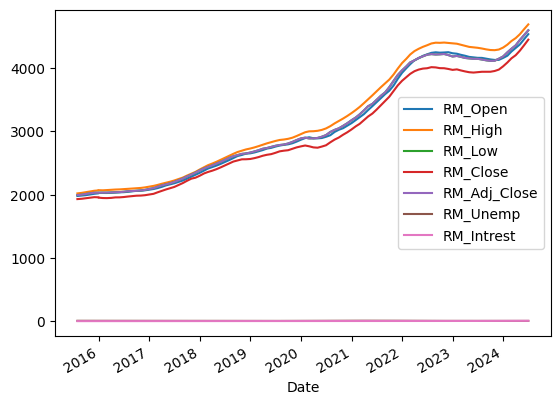

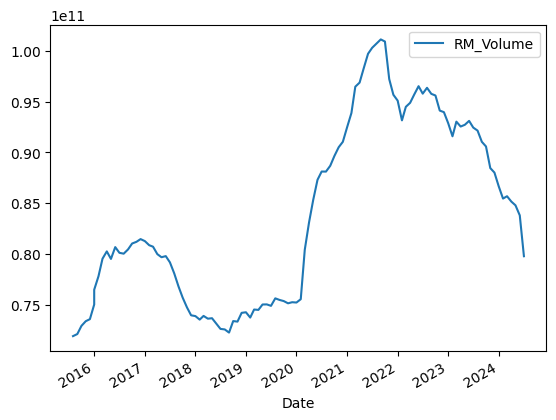

In [ ]:
print('Moving average')
secondDf
secondDf['RM_Open'] = secondDf['Open'].rolling(window=20).mean()
secondDf['RM_High'] = secondDf['High'].rolling(window=20).mean()
secondDf['RM_Low'] = secondDf['Close'].rolling(window=20).mean()
secondDf['RM_Close'] = secondDf['Low'].rolling(window=20).mean()
secondDf['RM_Adj_Close'] = secondDf['Adj Close'].rolling(window=20).mean()
secondDf['RM_Volume'] = secondDf['Volume'].rolling(window=20).mean()
secondDf['RM_Unemp'] = secondDf['Unemp Rate%'].rolling(window=20).mean()
secondDf['RM_Intrest'] = secondDf['Interest Rates'].rolling(window=20).mean()

print(secondDf[['Date', 'RM_Open', 'RM_High', 'RM_Low', 'RM_Close', 'RM_Adj_Close', 'RM_Volume', 'RM_Unemp', 'RM_Intrest']])
secondDf.plot(x='Date', y=['RM_Open', 'RM_High', 'RM_Low', 'RM_Close', 'RM_Adj_Close','RM_Unemp', 'RM_Intrest'])
secondDf.plot(x='Date', y=['RM_Volume'])




In [ ]:
analysis_std = {col: df[col].std() for col in columns}

print("Standard Deviations:")
for col, std in analysis_std.items():
    print(f"{col}: {std}")

Standard Deviations:
Open: 1004.140982478706
High: 1047.2544620398508
Low: 969.0649254871545
Close: 1013.3805160477925
Adj Close: 1013.3805160477925
Volume: 16341127914.957777
Unemp Rate%: 1.7336007484764506
Interest Rates: 1.7780662768972841


In [ ]:
analysis = {}

for col in columns:
    max_value = df[col].max()
    min_value = df[col].min()
    max_date = df.loc[df[col] == max_value, 'Date'].iloc[0].strftime('%Y-%m-%d')
    min_date = df.loc[df[col] == min_value, 'Date'].iloc[0].strftime('%Y-%m-%d')
    analysis[col] = {
        'Maximum': f"{max_date} ${max_value}",
        'Minimum': f"{min_date} ${min_value}"
    }

for col, values in analysis.items():
    analysis.items()
    print(f"{col}:")
    print(f"  Max: {values['Maximum']}")
    print(f"  Min: {values['Minimum']}")

Open:
  Max: 2024-07-01 $5471.08
  Min: 2015-10-01 $1919.65
High:
  Max: 2024-07-01 $5570.33
  Min: 2016-02-01 $1962.96
Low:
  Max: 2024-07-01 $5444.63
  Min: 2016-02-01 $1810.1
Close:
  Max: 2024-07-01 $5567.19
  Min: 2015-09-01 $1920.03
Adj Close:
  Max: 2024-07-01 $5567.19
  Min: 2015-09-01 $1920.03
Volume:
  Max: 2020-03-01 $162185380000.0
  Min: 2024-07-01 $12251260000.0
Unemp Rate%:
  Max: 2020-03-01 $14.8
  Min: 2022-12-01 $3.4
Interest Rates:
  Max: 2023-07-01 $5.33
  Min: 2020-02-01 $0.05


Enter the current Unemployment Rate (%):
3
Enter the current Interest Rate (%):
3
Enter the number of months to predict:
5

Predicted S&P 500 values for the next 5 months:
Month 1:
  Open: $5622.04
  Close: $5697.62
  Adj Close: $5697.62
Month 2:
  Open: $5777.17
  Close: $5831.12
  Adj Close: $5831.12
Month 3:
  Open: $5936.57
  Close: $5967.73
  Adj Close: $5967.73
Month 4:
  Open: $6100.38
  Close: $6107.55
  Adj Close: $6107.55
Month 5:
  Open: $6268.71
  Close: $6250.65
  Adj Close: $6250.65


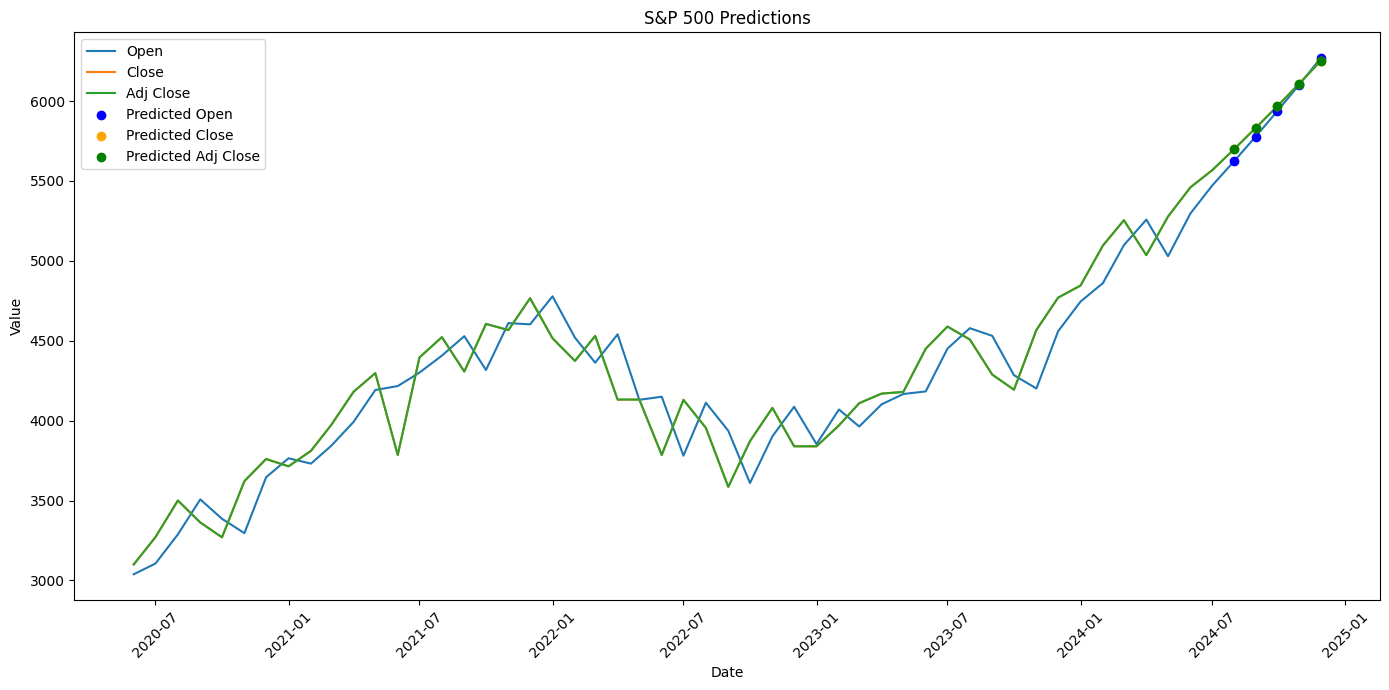

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from datetime import timedelta

df.dropna(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

avg_pct_change_effects = {
    'Open': df['Pct_Change_Open'].mean(),
    'Close': df['Pct_Change_Close'].mean(),
    'Adj_Close': df['Pct_Change_Adj_Close'].mean()
}

Independent = ['Pct_Change_Unemp_Rate%', 'Pct_Change_Interest_Rates']
Dependent = ['Pct_Change_Open', 'Pct_Change_Close', 'Pct_Change_Adj_Close']

X = df[Independent]
y = df[Dependent]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Support Vector Regressor": SVR()
}

predict_model = LinearRegression()
predict_model.fit(X_train, y_train)

def predict_sp500_values(unemp_rate, interest_rate, months=2):
    recent_data = df.iloc[-1]

    unemp_rate_effect = (unemp_rate - recent_data['Unemp Rate%']) / recent_data['Unemp Rate%'] * 100
    interest_rate_effect = (interest_rate - recent_data['Interest Rates']) / recent_data['Interest Rates'] * 100

    predictions = []

    for month in range(months):
        user_input = pd.DataFrame({
            'Pct_Change_Unemp_Rate%': [unemp_rate_effect],
            'Pct_Change_Interest_Rates': [interest_rate_effect]
        })

        predicted_pct_changes = predict_model.predict(user_input)

        predicted_values = {
            'Open': recent_data['Open'] * (1 + predicted_pct_changes[0][0] / 100) * (1 + avg_pct_change_effects['Open'] / 100),
            'Close': recent_data['Close'] * (1 + predicted_pct_changes[0][1] / 100) * (1 + avg_pct_change_effects['Close'] / 100),
            'Adj Close': recent_data['Adj Close'] * (1 + predicted_pct_changes[0][2] / 100) * (1 + avg_pct_change_effects['Adj_Close'] / 100)
        }

        predictions.append(predicted_values)
        recent_data = pd.Series({**predicted_values, 'Unemp Rate%': unemp_rate, 'Interest Rates': interest_rate})

    return predictions

def plot_predictions(predicted_values):
    historical_data = df[['Date', 'Open', 'Close', 'Adj Close']].tail(50)
    dates = list(historical_data['Date'])

    for month in range(len(predicted_values)):
        next_date = dates[-1] + timedelta(days=30)
        dates.append(next_date)

    open_values = list(historical_data['Open'])
    close_values = list(historical_data['Close'])
    adj_close_values = list(historical_data['Adj Close'])

    for prediction in predicted_values:
        open_values.append(prediction['Open'])
        close_values.append(prediction['Close'])
        adj_close_values.append(prediction['Adj Close'])

    plt.figure(figsize=(14, 7))
    plt.plot(dates, open_values, label='Open')
    plt.plot(dates, close_values, label='Close')
    plt.plot(dates, adj_close_values, label='Adj Close')

    plt.scatter(dates[-len(predicted_values):], [v['Open'] for v in predicted_values], color='blue', label='Predicted Open', zorder=5)
    plt.scatter(dates[-len(predicted_values):], [v['Close'] for v in predicted_values], color='orange', label='Predicted Close', zorder=5)
    plt.scatter(dates[-len(predicted_values):], [v['Adj Close'] for v in predicted_values], color='green', label='Predicted Adj Close', zorder=5)

    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('S&P 500 Predictions')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def userinteraction():
    print("Enter the current Unemployment Rate (%):")
    unemp_rate = float(input().strip())

    print("Enter the current Interest Rate (%):")
    interest_rate = float(input().strip())

    print("Enter the number of months to predict:")
    months = int(input().strip())

    predicted_values = predict_sp500_values(unemp_rate, interest_rate, months)
    print(f"\nPredicted S&P 500 values for the next {months} months:")
    for i, prediction in enumerate(predicted_values):
        print(f"Month {i+1}:")
        for key, value in prediction.items():
            print(f"  {key}: ${value:.2f}")

    plot_predictions(predicted_values)

if __name__ == "__main__":
    userinteraction()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


df.dropna(inplace=True)

avg_growth_rates = {col: df[f'Pct_Change_{col.replace(" ", "_")}'].mean() for col in columns}

Independent = ['Pct_Change_Open', 'Pct_Change_Volume', 'Pct_Change_Close', 'Pct_Change_Adj_Close']
Dependent = ['Open', 'Volume', 'Close']

X = df[Independent]
y = df[Dependent]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Support Vector Regressor": SVR()
}

predict_model = LinearRegression()
predict_model.fit(X_train, y_train)

def predict_sp500_values():
    recent_data = df.iloc[-1]

    predicted_values = {
        'Open': recent_data['Open'] * (1 + avg_growth_rates['Open'] / 100),
        'Volume': recent_data['Volume'] * (1 + avg_growth_rates['Volume'] / 100),
        'Close': recent_data['Close'] * (1 + avg_growth_rates['Close'] / 100),
    }

    return predicted_values

def userinteraction():
    predicted_values = predict_sp500_values()
    print(f"\nPredicted S&P 500 values for August 2024:")
    for key, value in predicted_values.items():
        print(f"{key}: ${value:.2f}")

if __name__ == "__main__":
    userinteraction()


Predicted S&P 500 values for August 2024:
Open: $5471.63
Volume: $12251837105.90
Close: $5567.76
